<a href="https://colab.research.google.com/github/YanaSemenenya/INTERPRETATOR/blob/develop/BaseInterpretator_example_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модель

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = cancer.target

rf_model = RandomForestClassifier( random_state=42, max_depth=4)
_ = rf_model.fit(X, y)

# Интерпретация модели

In [3]:
## Установка необходимых библиотек
#! pip install git+https://github.com/oracle/Skater.git@master
#! pip install git+https://github.com/YanaSemenenya/INTERPRETATOR.git@develop
#! pip uninstall yanapy

In [4]:
from yanapy.interpretators.baseinterpretator import BaseInterpretator

In [5]:
my_interpret = BaseInterpretator(rf_model, algorithm="random_forest")

## SHAP

In [6]:
my_interpret.fit_shap()

### summary_plot

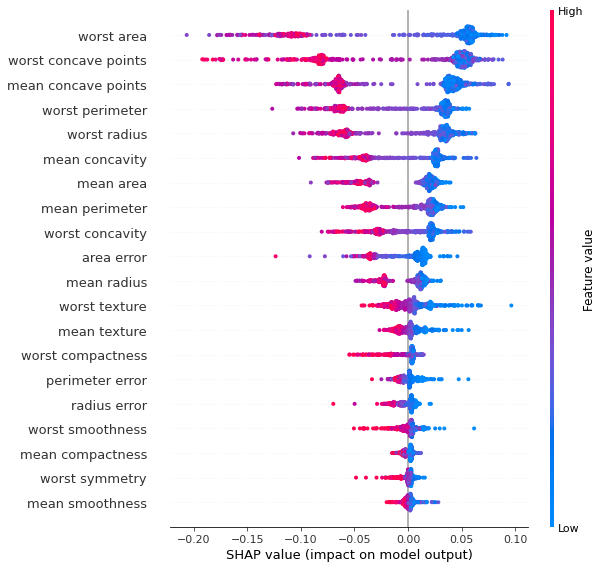

In [7]:
my_interpret.shap(X, type = "summary_plot")

### summary_bar_plot

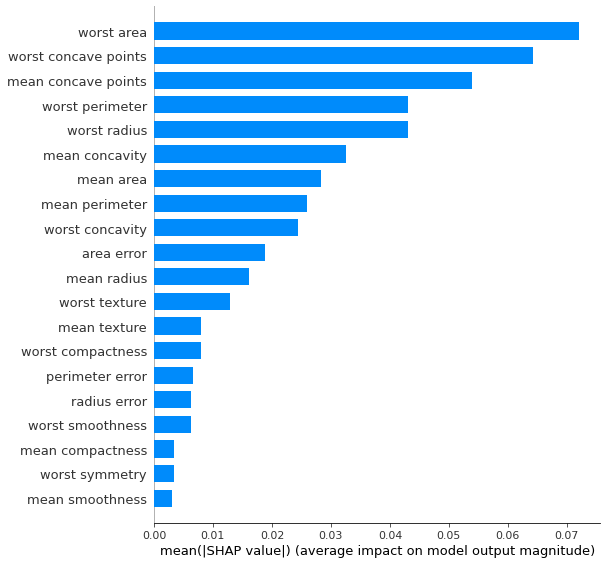

In [8]:
my_interpret.shap(X, type = "summary_bar_plot")

### individual_plot

In [9]:
my_interpret.shap(X, type = "individual_plot")

## PDP

In [10]:
my_interpret.fit_pdp(X)

2021-05-09 14:55:04,918 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[100/100] grid cells ████████████████████ Time elapsed: 16 seconds

[[<Figure size 1152x720 with 2 Axes>,

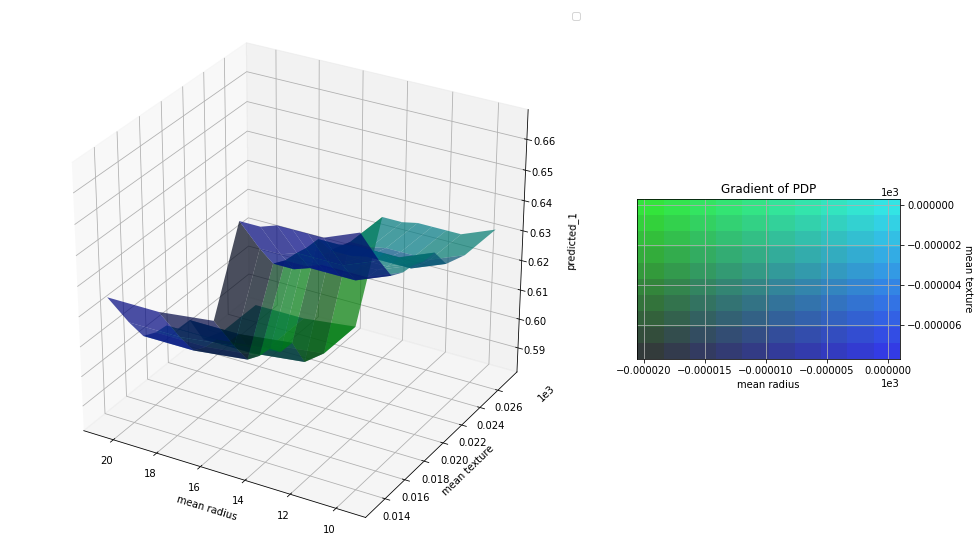

In [11]:
my_interpret.pdp(('mean radius', 'mean texture'), n_samples=100, grid_resolution=10)